In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
X, y = datasets.make_regression(n_samples=100, n_features=5, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

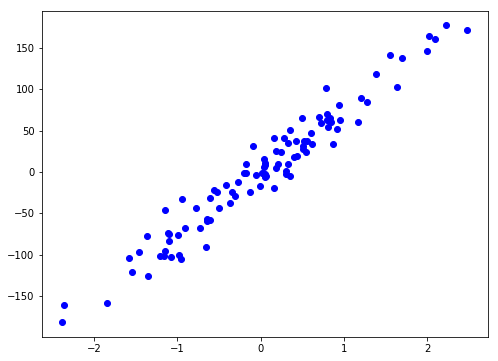

In [9]:
fig = plt.figure(figsize=(8,6))
plt.scatter(X, y, color='b');

In [13]:
#Importing the Dataset:

import pandas as pd

Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }

df = pd.DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price']) 
df

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256
5,2017,7,2.50,5.6,1254
6,2017,6,2.50,5.5,1234
7,2017,5,2.25,5.5,1195
8,2017,4,2.25,5.5,1159
9,2017,3,2.25,5.6,1167


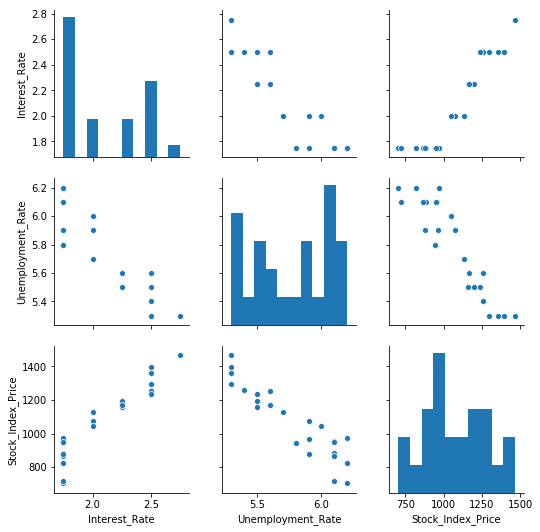

In [20]:
# Checking for correlation:
import seaborn as sns
dff = df[['Interest_Rate','Unemployment_Rate','Stock_Index_Price']]
sns.pairplot(dff)

In [33]:
X = df[['Interest_Rate','Unemployment_Rate']]
y = df['Stock_Index_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [139]:
#Making the Linear Regression Class:

class LinearRegression:
    
    def __init__(self, lr=0.01, n_it=100):
        self.lr = lr
        self.n_it = n_it
        self.w = None
        self.b = 0
    
    def fit(self, X, y):
        #Initialise the parameters:
        n_samples, n_features = X.shape
        self.w = np.random.randn(1, n_features)
        self.b = 0
        
        #Fitting using gradient descent
        for i in range(self.n_it):
            z = np.dot(X, (self.w).T)+ self.b
            k = np.array(y).reshape(y.count(), 1)
            dw = (1/n_samples)*np.dot(X.T, z-k)
            db = (1/n_samples)*np.sum(z-k)
            
            self.w -= self.lr*(dw.T)
            self.b -= self.lr*(db.T)
            
    def predict(self, X):
        y_pred = np.dot(X, (self.w).T) + self.b
        return y_pred


In [140]:
#Using the Linear Regressor:
regressor = LinearRegression(lr=0.1)
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

def mse(y_true, y_pred):
    y = np.array(y_true).reshape(y_true.count(), 1)
    return np.mean((y_pred-y)**2)
mse_value = mse(y_test, predicted)
print(mse_value)

1.2574061039448477e+99


In [154]:
#Using the Linear Regressor:
regressor = LinearRegression(n_it=100000)
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

def mse(y_true, y_pred):
    y = np.array(y_true).reshape(y_true.count(), 1)
    return np.mean((y_pred-y)**2)
mse_value = mse(y_test, predicted)
print(mse_value)
    


4364.403077525649


In [155]:
#Learning rate is the hyper parameter to tune here, not the number of iterations

In [64]:
#Snippets to understand:
'''a=np.random.randn(1, 2) #2 = n_features
print(type(a))
print(a.shape)
np.dot(X, a.T).shape

b=np.zeros(2)
print(type(b))
print(b.shape)
b'''

<class 'numpy.ndarray'>
(2,)


array([0., 0.])

In [114]:
w = np.random.randn(1, 2)
print(type(w))
print(w.shape)


<class 'numpy.ndarray'>
(1, 2)


In [117]:
k = np.array(y).reshape(y.count(), 1)
dw = (1/10)*np.dot(X.T, k)
dw.shape

(2, 1)

In [ ]:
#Normal implemetation:
